<a href="https://colab.research.google.com/github/teena496/Data-Analyst-Capstone-Project/blob/main/Hands_on_Lab_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA.


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install openpyxl

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [ ]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [ ]:
## Write your code here

df[['Employment', 'JobSat', 'RemoteWork']]

,Employment,JobSat,RemoteWork
0,"Employed, full-time",NaN,Remote
1,"Employed, full-time",NaN,Remote
2,"Employed, full-time",NaN,Remote
3,"Student, full-time",NaN,NaN
4,"Student, full-time",NaN,NaN
...,...,...,...
65432,"Employed, full-time",NaN,Remote
65433,"Employed, full-time",NaN,Remote
65434,"Employed, full-time",NaN,In-person
65435,"Employed, full-time",NaN,"Hybrid (some remote, some in-person)"


In [ ]:
df['JobSat'].median()
df['RemoteWork'].mode()

0    Hybrid (some remote, some in-person)
Name: RemoteWork, dtype: object

In [ ]:
df['Employment'].isnull().sum()
df['JobSat'].isnull().sum()
df['RemoteWork'].isnull().sum()


np.int64(10631)

In [ ]:
df.fillna({'JobSat': df['JobSat'].median()}, inplace=True)

In [ ]:
df['JobSat'].isnull().sum()

np.int64(0)

In [ ]:
df['RemoteWork'].dropna(inplace=True)

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [ ]:
df.fillna({'YearsCodePro': np.nan}, inplace=True)

df['YearsCodePro'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 51
}, )

df['YearsCodePro_cleaned'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
print(df['YearsCodePro_cleaned'].unique())
print(df['YearsCodePro_cleaned'].dtype)

[nan 17. 27.  7. 11. 25. 12. 10.  3. 18. 37. 15. 20.  6.  2. 16.  8. 14.
  4. 45.  1. 24. 29.  5. 30. 26.  9. 33. 13. 35. 23. 22. 31. 19. 21. 28.
 34. 32. 40. 50. 39. 44. 42. 41. 36. 38. 43. 47. 48. 46. 49.]
float64


In [ ]:
## Write your code here
import numpy as np
def get_experience_category(years):
    if pd.isnull(years):
        return np.nan
    elif 0 <= years <= 5:
        return 'Beginner'
    elif 5 <= years <= 10:
        return 'Intermediate'
    elif 10 <= years <= 20:
        return 'Experienced'
    elif years > 20:
        return 'Expert'

df['Experience Level'] = df['YearsCodePro_cleaned'].apply(get_experience_category)


In [ ]:
df['Experience Level'].unique()

array([nan, 'Experienced', 'Expert', 'Intermediate', 'Beginner'],
      dtype=object)

In [ ]:
median_job_sat = df.groupby('Experience Level')['JobSat'].median()
median_job_sat

Experience Level
Beginner        7.0
Experienced     7.0
Expert          7.0
Intermediate    7.0
Name: JobSat, dtype: float64

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


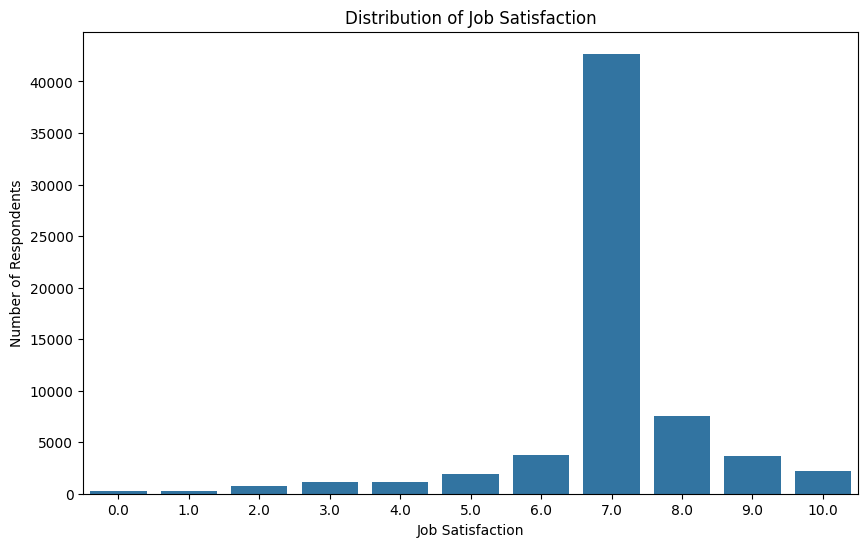

In [ ]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='JobSat')

plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Respondents')
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


In [ ]:
df['RemoteWork'].unique()
df['RemoteWork'].replace({'Hybrid (some remote, some in-person)': 'Hybrid'},inplace=True)

/tmp/ipykernel_300/1667586466.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].replace({'Hybrid (some remote, some in-person)': 'Hybrid'},inplace=True)


/tmp/ipykernel_300/4166450575.py:2: FutureWarning: DataFrame.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df.replace()


<Axes: xlabel='RemoteWork', ylabel='count'>

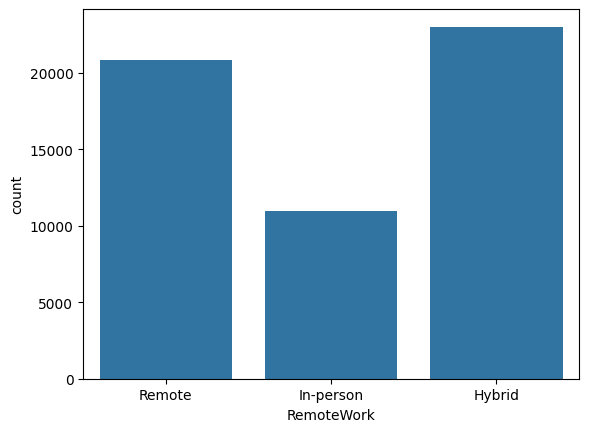

In [ ]:
## Write your code here
df.replace()
sns.countplot(data=df, x='RemoteWork')

In [ ]:
cross_tab = df.pivot_table(index=['Employment', 'DevType'],
                           columns='RemoteWork',
                           aggfunc='size',
                           fill_value=0)

cross_tab

RemoteWork                                                            Hybrid  \
Employment                             DevType                                 
Employed, full-time                    Academic researcher               324   
                                       Blockchain                         16   
                                       Cloud infrastructure engineer     220   
                                       Data engineer                     430   
                                       Data or business analyst          177   
...                                                                      ...   
Student, part-time;Employed, part-time Research & Development role         3   
                                       Scientist                           1   
                                       Security professional               2   
                                       Student                            23   
                                       System administrator                4   

RemoteWork                                                            In-person  \
Employment                             DevType                                    
Employed, full-time                    Academic researcher                  209   
                                       Blockchain                            14   
                                       Cloud infrastructure engineer         42   
                                       Data engineer                        110   
                                       Data or business analyst              96   
...                                                                         ...   
Student, part-time;Employed, part-time Research & Development role            3   
                                       Scientist                              0   
                                       Security professional                  1   
                                       Student                               24   
                                       System administrator                   4   

RemoteWork                                                            Remote  
Employment                             DevType                                
Employed, full-time                    Academic researcher                43  
                                       Blockchain                         66  
                                       Cloud infrastructure engineer     216  
                                       Data engineer                     297  
                                       Data or business analyst           77  
...                                                                      ...  
Student, part-time;Employed, part-time Research & Development role         1  
                                       Scientist                           1  
                                       Security professional               0  
                                       Student                            10  
                                       System administrator                0  

[757 rows x 3 columns]

In [ ]:
pd.crosstab(index=[df['Employment'], df['DevType']],
            columns=df['RemoteWork'],
            normalize='index').round(2)

RemoteWork                                                            Hybrid  \
Employment                             DevType                                 
Employed, full-time                    Academic researcher              0.56   
                                       Blockchain                       0.17   
                                       Cloud infrastructure engineer    0.46   
                                       Data engineer                    0.51   
                                       Data or business analyst         0.51   
...                                                                      ...   
Student, part-time;Employed, part-time Research & Development role      0.43   
                                       Scientist                        0.50   
                                       Security professional            0.67   
                                       Student                          0.40   
                                       System administrator             0.50   

RemoteWork                                                            In-person  \
Employment                             DevType                                    
Employed, full-time                    Academic researcher                 0.36   
                                       Blockchain                          0.15   
                                       Cloud infrastructure engineer       0.09   
                                       Data engineer                       0.13   
                                       Data or business analyst            0.27   
...                                                                         ...   
Student, part-time;Employed, part-time Research & Development role         0.43   
                                       Scientist                           0.00   
                                       Security professional               0.33   
                                       Student                             0.42   
                                       System administrator                0.50   

RemoteWork                                                            Remote  
Employment                             DevType                                
Employed, full-time                    Academic researcher              0.07  
                                       Blockchain                       0.69  
                                       Cloud infrastructure engineer    0.45  
                                       Data engineer                    0.35  
                                       Data or business analyst         0.22  
...                                                                      ...  
Student, part-time;Employed, part-time Research & Development role      0.14  
                                       Scientist                        0.50  
                                       Security professional            0.00  
                                       Student                          0.18  
                                       System administrator             0.00  

[757 rows x 3 columns]

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [ ]:
df['LanguageHaveWorkedWith'].unique()
df['Country'].unique()

lang_region_df = df[['Country','LanguageHaveWorkedWith']].dropna()
lang_region_df

,Country,LanguageHaveWorkedWith
1,United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2,United Kingdom of Great Britain and Northern I...,C#
3,Canada,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...
4,Norway,C++;HTML/CSS;JavaScript;Lua;Python;Rust
5,United States of America,Bash/Shell (all shells);HTML/CSS;Java;JavaScri...
...,...,...
65401,France,C#;HTML/CSS;JavaScript;SQL;TypeScript
65408,France,Groovy;Java;JavaScript;Python;SQL
65412,Italy,Java;Kotlin
65431,Belgium,Bash/Shell (all shells);C;C#;C++;Delphi;Groovy...


In [ ]:
lang_region_df = lang_region_df.assign(
    Language=lang_region_df['LanguageHaveWorkedWith'].str.split(';')
).explode('Language')
lang_region_df

,Country,LanguageHaveWorkedWith,Language
1,United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells)
1,United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Go
1,United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,HTML/CSS
1,United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Java
1,United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,JavaScript
...,...,...,...
65435,Germany,C;C++;Go;Lua;Objective-C;Python;Rust;SQL,Lua
65435,Germany,C;C++;Go;Lua;Objective-C;Python;Rust;SQL,Objective-C
65435,Germany,C;C++;Go;Lua;Objective-C;Python;Rust;SQL,Python
65435,Germany,C;C++;Go;Lua;Objective-C;Python;Rust;SQL,Rust


In [ ]:
language_counts = lang_region_df.groupby(['Country', 'Language']).size().reset_index(name='Count')
language_counts

,Country,Language,Count
0,Afghanistan,Ada,9
1,Afghanistan,Apex,4
2,Afghanistan,Assembly,7
3,Afghanistan,Bash/Shell (all shells),14
4,Afghanistan,C,13
...,...,...,...
5514,Zimbabwe,Rust,4
5515,Zimbabwe,SQL,15
5516,Zimbabwe,TypeScript,11
5517,Zimbabwe,VBA,2


In [ ]:
heatmap_data = language_counts.pivot(index='Country', columns='Language', values='Count').fillna(0)
heatmap_data

Language,Ada,Apex,Assembly,Bash/Shell (all shells),C,C#,C++,Clojure,Cobol,Crystal,Dart,Delphi,Elixir,Erlang,F#,Fortran,GDScript,Go,Groovy,HTML/CSS,Haskell,Java,JavaScript,Julia,Kotlin,Lisp,Lua,MATLAB,MicroPython,Nim,OCaml,Objective-C,PHP,Perl,PowerShell,Prolog,Python,R,Ruby,Rust,SQL,Scala,Solidity,Swift,TypeScript,VBA,Visual Basic (.Net),Zephyr,Zig
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,9.0,4.0,7.0,14.0,13.0,8.0,13.0,4.0,3.0,5.0,7.0,6.0,5.0,3.0,3.0,3.0,4.0,7.0,5.0,24.0,3.0,12.0,25.0,3.0,5.0,3.0,4.0,4.0,5.0,3.0,3.0,3.0,15.0,3.0,6.0,3.0,25.0,4.0,4.0,8.0,21.0,4.0,4.0,3.0,12.0,5.0,3.0,4.0,6.0
Albania,5.0,0.0,1.0,10.0,7.0,12.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,25.0,4.0,16.0,26.0,0.0,4.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,16.0,1.0,4.0,0.0,9.0,1.0,0.0,1.0,28.0,2.0,0.0,1.0,14.0,1.0,1.0,0.0,0.0
Algeria,3.0,1.0,7.0,9.0,14.0,14.0,9.0,0.0,0.0,1.0,14.0,4.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,52.0,0.0,13.0,53.0,2.0,7.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,20.0,1.0,7.0,1.0,37.0,1.0,0.0,3.0,35.0,0.0,0.0,1.0,32.0,1.0,0.0,0.0,1.0
Andorra,1.0,0.0,0.0,4.0,3.0,6.0,4.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,5.0,7.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,1.0,8.0,1.0,0.0,2.0,8.0,0.0,3.0,1.0,7.0,0.0,0.0,0.0,0.0
Angola,3.0,1.0,1.0,3.0,4.0,4.0,3.0,1.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,8.0,0.0,5.0,10.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,9.0,0.0,1.0,1.0,8.0,0.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Venezuela, Bolivarian Republic of...",1.0,0.0,1.0,18.0,10.0,12.0,11.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,6.0,2.0,43.0,1.0,16.0,53.0,0.0,5.0,1.0,7.0,3.0,0.0,0.0,0.0,0.0,24.0,0.0,8.0,0.0,25.0,1.0,3.0,3.0,33.0,2.0,0.0,1.0,25.0,6.0,6.0,0.0,0.0
Viet Nam,0.0,0.0,21.0,70.0,71.0,88.0,109.0,1.0,1.0,1.0,22.0,1.0,3.0,0.0,0.0,0.0,8.0,38.0,9.0,159.0,2.0,126.0,205.0,0.0,29.0,1.0,17.0,15.0,4.0,1.0,1.0,10.0,53.0,2.0,35.0,1.0,137.0,9.0,12.0,25.0,145.0,5.0,3.0,15.0,122.0,14.0,6.0,0.0,3.0
Yemen,1.0,0.0,0.0,3.0,2.0,7.0,5.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,4.0,12.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,2.0,10.0,0.0,1.0,0.0,8.0,0.0,0.0,0.0,8.0,2.0,2.0,0.0,0.0


In [ ]:
top_languages = lang_region_df['Language'].value_counts().nlargest(10).index
top_countries = lang_region_df['Country'].value_counts().nlargest(10).index

filtered = language_counts[
    language_counts['Language'].isin(top_languages) &
    language_counts['Country'].isin(top_countries)
]
heatmap_data = filtered.pivot(index='Country', columns='Language', values='Count').fillna(0)
heatmap_data

Language,Bash/Shell (all shells),C,C#,C++,HTML/CSS,Java,JavaScript,Python,SQL,TypeScript
Country,,,,,,,,,,
Canada,798,415,603,488,1097,571,1296,1118,1073,796
France,858,594,410,567,1114,706,1281,1186,1069,861
Germany,1970,1147,1185,1315,2514,1818,2732,2640,2297,1868
India,759,1084,645,1127,2322,1549,2730,2128,1986,1405
Italy,466,354,381,381,717,519,841,698,767,483
Netherlands,518,261,439,312,755,424,906,698,727,636
Poland,552,337,430,457,708,460,851,782,724,593
Ukraine,579,256,612,430,1198,664,1532,961,1215,980
United Kingdom of Great Britain and Northern Ireland,1231,563,1089,651,1707,701,2011,1634,1663,1190


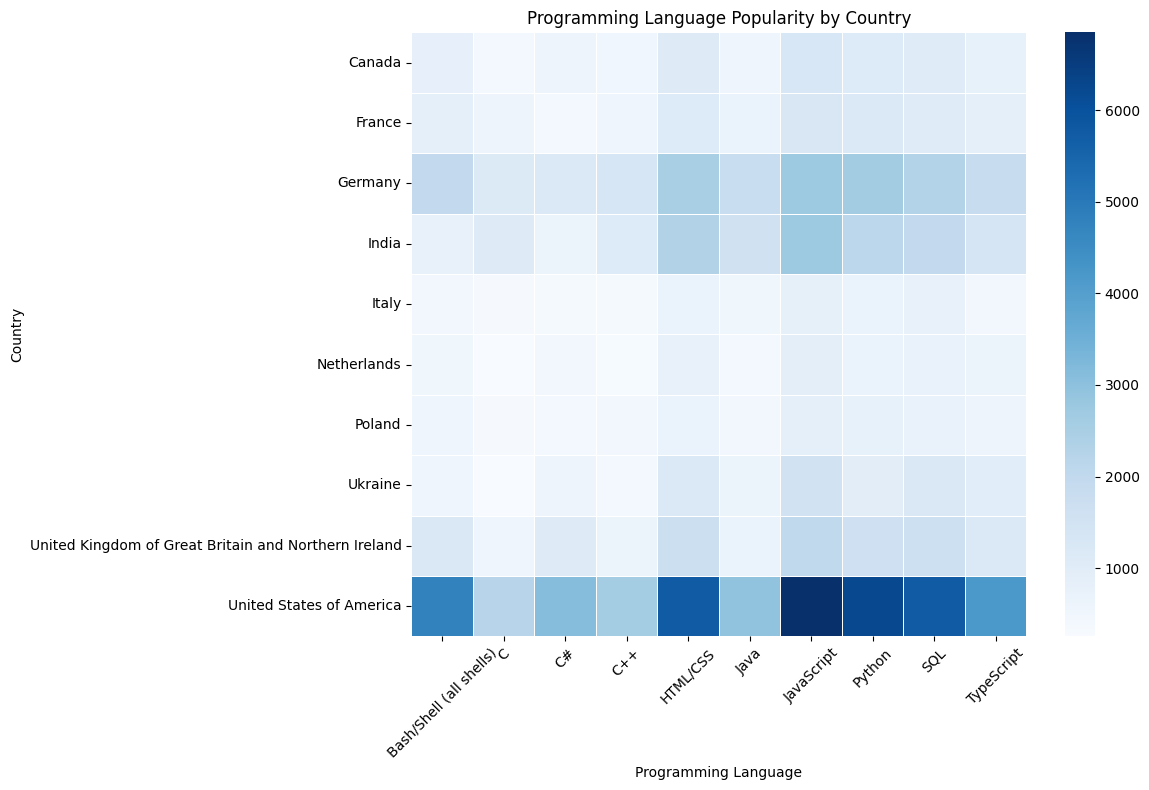

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', linewidths=.5)
plt.title('Programming Language Popularity by Country')
plt.xlabel('Programming Language')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


In [ ]:
## Write your code here
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': '0.5',
    'More than 50 years': '51'
}).astype(float)

df = df.dropna(subset=['YearsCodePro', 'JobSatPoints_1'])
df

/tmp/ipykernel_300/58344990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearsCodePro'] = df['YearsCodePro'].replace({


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,YearsCodePro_cleaned,Experience Level
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17.0,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disagree,Disagree,Agree,Agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,7.0,17.0,Experienced
12,13,I am a developer by profession,35-44 years old,"Employed, full-time",Hybrid,Apples,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Sch...,NaN,NaN,20,12.0,"Developer, back-end",NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,Bash/Shell (all shells);C#;JavaScript;PowerShe...,Bash/Shell (all shells);JavaScript;VBA,Bash/Shell (all shells);JavaScript;VBA,MySQL,MySQL,MySQL,Amazon Web S

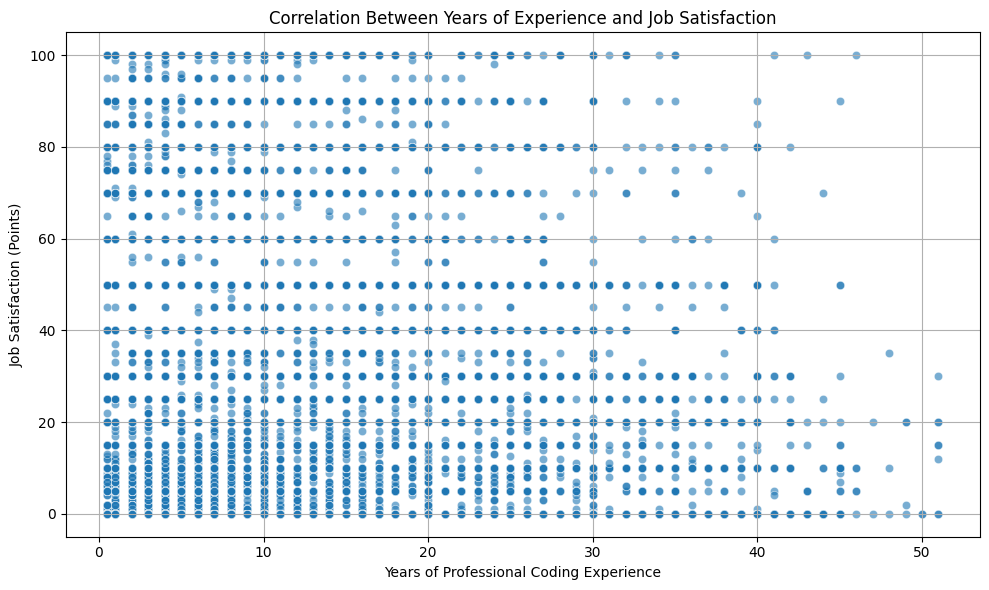

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsCodePro', y='JobSatPoints_1', data=df, alpha=0.6)
plt.title('Correlation Between Years of Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True)
plt.tight_layout()
plt.show()


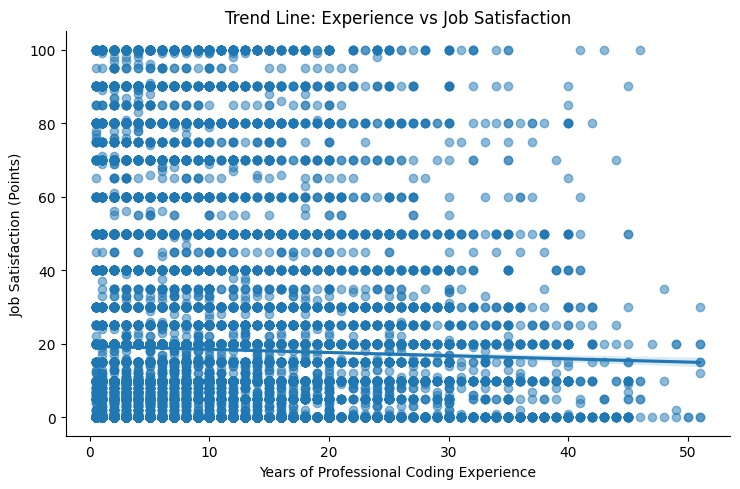

In [ ]:
sns.lmplot(x='YearsCodePro', y='JobSatPoints_1', data=df, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title('Trend Line: Experience vs Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction (Points)')
plt.tight_layout()
plt.show()


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [ ]:
df['EdLevel'].unique()
df['Employment'].unique()



edlevel_emp_df = df[['EdLevel','Employment']].dropna()
edlevel_emp_df

,EdLevel,Employment
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time"
12,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time"
15,Some college/university study without earning ...,"Employed, full-time"
18,Some college/university study without earning ...,"Employed, full-time"
20,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time"
...,...,...
65168,"Secondary school (e.g. American high school, G...","Employed, full-time"
65178,Some college/university study without earning ...,"Employed, full-time"
65265,Some college/university study without earning ...,"Employed, full-time"
65351,Some college/university study without earning ...,"Employed, full-time;Independent contractor, fr..."


In [ ]:
edlevel_emp_df = edlevel_emp_df.assign(
    Employment_Types=edlevel_emp_df['Employment'].str.split(';')
).explode('Employment_Types')
edlevel_emp_df

,EdLevel,Employment,Employment_Types
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time","Employed, full-time"
12,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time","Employed, full-time"
15,Some college/university study without earning ...,"Employed, full-time","Employed, full-time"
18,Some college/university study without earning ...,"Employed, full-time","Employed, full-time"
20,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time","Employed, full-time"
...,...,...,...
65178,Some college/university study without earning ...,"Employed, full-time","Employed, full-time"
65265,Some college/university study without earning ...,"Employed, full-time","Employed, full-time"
65351,Some college/university study without earning ...,"Employed, full-time;Independent contractor, fr...","Employed, full-time"
65351,Some college/university study without earning ...,"Employed, full-time;Independent contractor, fr...","Independent contractor, freelancer, or self-em..."


In [ ]:
emp_counts = edlevel_emp_df.groupby(['EdLevel', 'Employment_Types']).size().reset_index(name='Count')
emp_counts

,EdLevel,Employment_Types,Count
0,"Associate degree (A.A., A.S., etc.)","Employed, full-time",791
1,"Associate degree (A.A., A.S., etc.)","Employed, part-time",60
2,"Associate degree (A.A., A.S., etc.)","Independent contractor, freelancer, or self-em...",134
3,"Associate degree (A.A., A.S., etc.)","Not employed, and not looking for work",2
4,"Associate degree (A.A., A.S., etc.)","Not employed, but looking for work",3
...,...,...,...
57,Something else,"Not employed, and not looking for work",1
58,Something else,"Not employed, but looking for work",3
59,Something else,Retired,2
60,Something else,"Student, full-time",10


In [ ]:
heatmap_data = emp_counts.pivot(index='EdLevel', columns='Employment_Types', values='Count').fillna(0)
heatmap_data

Employment_Types,"Employed, full-time","Employed, part-time","Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,"Student, full-time","Student, part-time"
EdLevel,,,,,,,,
"Associate degree (A.A., A.S., etc.)",791.0,60.0,134.0,2.0,3.0,2.0,40.0,47.0
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11856.0,692.0,1690.0,4.0,65.0,3.0,380.0,384.0
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",7431.0,386.0,1199.0,7.0,33.0,4.0,145.0,160.0
Primary/elementary school,109.0,18.0,29.0,1.0,1.0,1.0,13.0,4.0
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",1252.0,65.0,174.0,1.0,4.0,5.0,14.0,18.0
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",1097.0,265.0,296.0,0.0,16.0,0.0,212.0,95.0
Some college/university study without earning a degree,2796.0,296.0,642.0,4.0,13.0,6.0,201.0,195.0
Something else,250.0,24.0,50.0,1.0,3.0,2.0,10.0,17.0


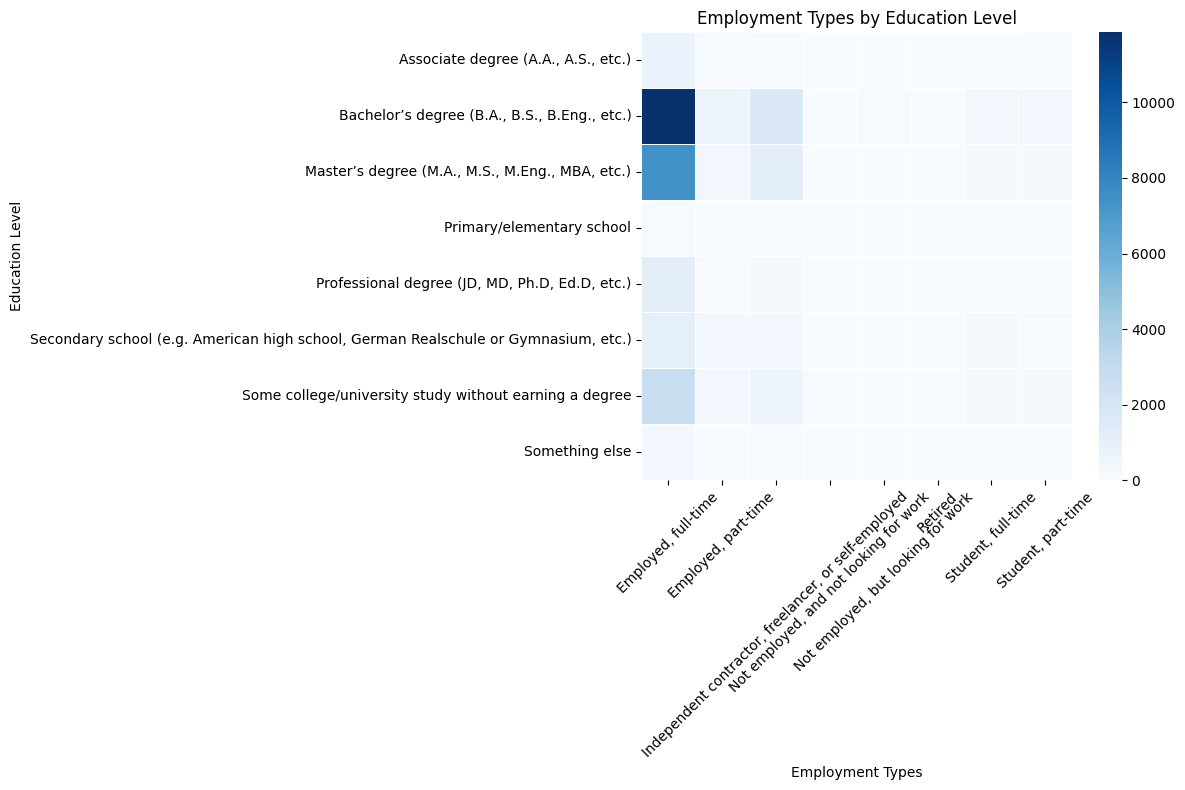

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', linewidths=.5)
plt.title('Employment Types by Education Level')
plt.xlabel('Employment Types')
plt.ylabel('Education Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
heatmap_data = pd.crosstab(emp_counts['EdLevel'], emp_counts['Employment_Types'], values=emp_counts['Count'], aggfunc='sum').fillna(0)
heatmap_data

Employment_Types,"Employed, full-time","Employed, part-time","Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,"Student, full-time","Student, part-time"
EdLevel,,,,,,,,
"Associate degree (A.A., A.S., etc.)",791.0,60.0,134.0,2.0,3.0,2.0,40.0,47.0
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11856.0,692.0,1690.0,4.0,65.0,3.0,380.0,384.0
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",7431.0,386.0,1199.0,7.0,33.0,4.0,145.0,160.0
Primary/elementary school,109.0,18.0,29.0,1.0,1.0,1.0,13.0,4.0
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",1252.0,65.0,174.0,1.0,4.0,5.0,14.0,18.0
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",1097.0,265.0,296.0,0.0,16.0,0.0,212.0,95.0
Some college/university study without earning a degree,2796.0,296.0,642.0,4.0,13.0,6.0,201.0,195.0
Something else,250.0,24.0,50.0,1.0,3.0,2.0,10.0,17.0


In [ ]:
heatmap_data = pd.crosstab(
    emp_counts['EdLevel'],
    emp_counts['Employment_Types'],
    values=emp_counts['Count'],
    aggfunc='sum',
    normalize='index'  # normalizes row-wise
).fillna(0) * 100  # convert to percentage
heatmap_data

Employment_Types,"Employed, full-time","Employed, part-time","Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,"Student, full-time","Student, part-time"
EdLevel,,,,,,,,
"Associate degree (A.A., A.S., etc.)",73.308619,5.560704,12.418906,0.185357,0.278035,0.185357,3.707136,4.355885
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",78.651984,4.590686,11.211357,0.026536,0.431206,0.019902,2.520897,2.547433
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",79.348639,4.121730,12.802990,0.074746,0.352376,0.042712,1.548318,1.708489
Primary/elementary school,61.931818,10.227273,16.477273,0.568182,0.568182,0.568182,7.386364,2.272727
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",81.669928,4.240052,11.350294,0.065232,0.260926,0.326158,0.913242,1.174168
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",55.376073,13.377082,14.941949,0.000000,0.807673,0.000000,10.701666,4.795558
Some college/university study without earning a degree,67.324825,7.127378,15.458705,0.096316,0.313027,0.144474,4.839875,4.695401
Something else,70.028011,6.722689,14.005602,0.280112,0.840336,0.560224,2.801120,4.761905


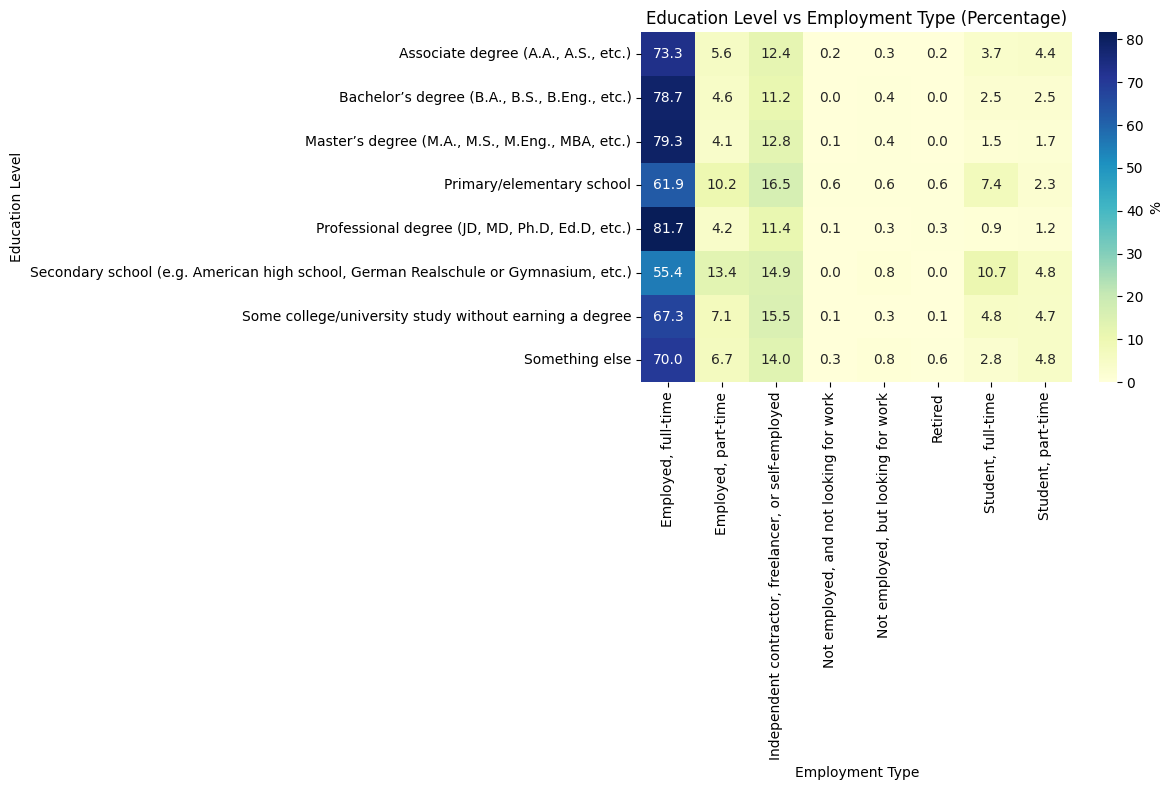

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': '%'})
plt.title('Education Level vs Employment Type (Percentage)')
plt.xlabel('Employment Type')
plt.ylabel('Education Level')
plt.tight_layout()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here
df.to_excel('cleaned_dataset.xlsx', index=False)


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
